/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ign

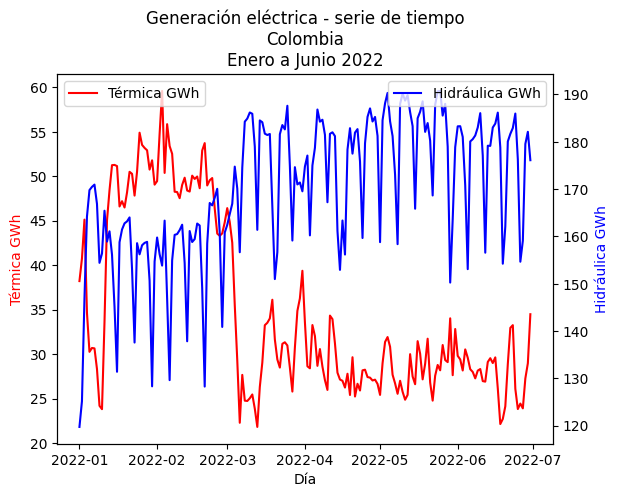

In [ ]:
# Sector eléctrico en Colombia
# Generación por recurso

!pip install pydataxm
!pip install requests

import requests
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates

import matplotlib.pyplot as plt

from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
objetoAPI = pydataxm.ReadDB()  # Se asigna un objeto que pueda realizar el consumo de la data en la API
df =objetoAPI.get_collections()
df=objetoAPI.get_collections("Gene")
df=objetoAPI.get_collections("ListadoRecursos")
#Obtención de datos con los parámetros Gene y Recurso del primer semestre 2022
df_variable = objetoAPI.request_data(
"Gene",
"Recurso",
dt.date(2022, 1, 1),
dt.date(2022, 6, 30))
df_g = df_variable.copy()
df_g = df_g.fillna(0)
df_g['GWh'] = df_g.sum(axis=1, numeric_only=True).div(10**6)
df_r = objetoAPI.request_data(
"ListadoRecursos",
"Sistema",
dt.date(2022, 1, 1),
dt.date(2022, 6, 30))

df_gr = df_g.merge(df_r, left_on='Values_code', right_on='Values_Code')

df_grt = df_gr.copy()
df_grt = df_grt[df_grt['Values_Type']=='TERMICA']
df_grt = df_grt.groupby(['Date_x']).sum()
df_grh = df_gr.copy()
df_grh = df_grh[df_grh['Values_Type']=='HIDRAULICA']
df_grh = df_grh.groupby(['Date_x']).sum()

df_graph = pd.DataFrame()
df_graph['Térmica GWh'] = df_grt['GWh']
df_graph['Hidráulica GWh'] = df_grh['GWh']
df_graph

df_line = df_graph.copy()
df_line = df_line.reset_index()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Graficar las dos líneas en los ejes respectivos
ax1.plot(df_line['Date_x'], df_line['Térmica GWh'], color='r', label='Térmica GWh')
ax2.plot(df_line['Date_x'], df_line['Hidráulica GWh'], color='b', label='Hidráulica GWh')

# Personalizar las leyendas y los ejes
ax1.set_xlabel('Día')
ax1.set_ylabel('Térmica GWh', color='r')
ax2.set_ylabel('Hidráulica GWh', color='b')

# Agregar título y leyendas
plt.title('Generación eléctrica - serie de tiempo\nColombia\nEnero a Junio 2022')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
